In [ ]:
%pip install semantic-link==0.6.0
%pip install pyspark
%pip install azure-keyvault-secrets==4.7.0
%pip install azure-identity
%pip install azure-mgmt-resource
%pip install azure-storage-blob
%pip install azure-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: semantic-link-sempy
    Found existing installation: semantic-link-sempy 0.8.5
    Uninstalling semantic-link-sempy-0.8.5:
      Successfully uninstalled semantic-link-sempy-0.8.5
  Attempting uninstall: semantic-link-functions-validators
    Found existing installation: semantic-link-functions-validators 0.8.5
    Uninstalling semantic-link-functions-validators-0.8.5:
      Successfully uninstalled semantic-link-functions-validators-0.8.5
  Attempting uninstall: semantic-link-functions-phonenumbers
    Found existing installation: semantic-link-functions-phonenumbers 0.8.5
    Uninstalling semantic-link-functions-phonenumbers-0.8.5:
      Successfully uninstalled semantic-link-functions-phonenumbers-0.8.5
  Attempting uninstall: semantic-link-functions-meteostat
    Found existing installation: semantic-link-functions-meteostat 0.8.5
    Uninstalling semantic-link-functions-meteostat-0

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [1]:
import pandas as pd
import sempy.fabric as fabric
from sempy.fabric import FabricDataFrame
from sempy.dependencies import plot_dependency_metadata
from sempy.samples import download_synthea

In [2]:
download_synthea(which='small')

'synthea/csv'

## Explorer les données

In [3]:
providers = FabricDataFrame(pd.read_csv("synthea/csv/providers.csv"))
providers.head()

,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
0,3421aa75-dec7-378d-a9e0-0bc764e4cb0d,ef58ea08-d883-3957-8300-150554edc8fb,Tomas436 Sauer652,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,1557
1,c9b3c857-2e24-320c-a79a-87b8a60de63c,69176529-fd1f-3b3f-abce-a0a3626769eb,Suzette512 Monahan736,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,2296
2,0359f968-d1a6-30eb-b1cc-e6cc0b4d3513,5e765f2b-e908-3888-9fc7-df2cb87beb58,Gaynell126 Streich926,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,2287
3,446d1609-858f-3a54-8a52-0c4eacedd00e,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Patricia625 Salgado989,F,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,1327
4,e6283e46-fd81-3611-9459-0edb1c3da357,e002090d-4e92-300e-b41e-7d1f21dee4c6,Jeanmarie510 Beatty507,F,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,3199


In [ ]:
providers.shape

(5855, 12)

### Vérifiez les problèmes de qualité des données avec la fonction find_dependencies de SemPy en traçant un graphique des dépendances fonctionnelles détectées automatiquement :

INFO:SemPy:{'func': 'sempy.fabric._dataframe._fabric_dataframe.find_dependencies', 'self.type': 'sempy.fabric._dataframe._fabric_dataframe.FabricDataFrame', 'self.shape': (5855, 12), 'result.shape': (26, 7), 'total_seconds': 72.9}


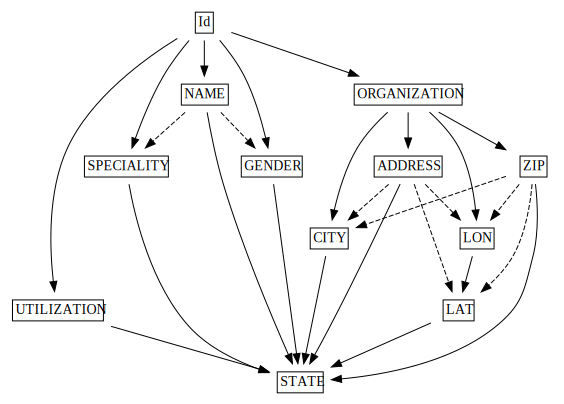

In [4]:
deps = providers.find_dependencies()
plot_dependency_metadata(deps)

### Le graphique des dépendances fonctionnelles montre que Id détermine le NOM et l'ORGANISATION (indiqués par les flèches pleines), ce qui est attendu puisque Id est unique :

In [5]:
providers.Id.is_unique

True

## Analyser en profondeur les dépendances fonctionnelles

Le graphique des dépendances fonctionnelles montre également que ORGANIZATION détermine ADDRESS et ZIP, comme prévu. Cependant, vous pouvez vous attendre à ce que ZIP détermine également CITY, mais la flèche en pointillé indique que la dépendance n'est qu'approximative, pointant vers un problème de qualité des données.

Il y a d'autres particularités dans le graphique. Par exemple, NOM ne détermine pas le SEXE, l'ID, la SPÉCIALITÉ ou l'ORGANISATION. Chacun de ces éléments mériterait peut-être d’être étudié.

Examinez de plus près la relation approximative entre ZIP et CITY, en utilisant la fonction list_dependency_violations de SemPy pour voir une liste tabulaire des violations :


In [6]:
providers.list_dependency_violations('ZIP', 'CITY')

INFO:SemPy:{'func': 'sempy.fabric._dataframe._fabric_dataframe.list_dependency_violations', 'self.type': 'sempy.fabric._dataframe._fabric_dataframe.FabricDataFrame', 'self.shape': (5855, 12), 'determinant_col': "'ZIP'", 'dependent_col': "'CITY'", 'result.shape': (38, 3), 'total_seconds': 174.0}


,ZIP,CITY,count
0,02135-3514,BOSTON,53
1,02135-3514,BRIGHTON,2
2,02747-1262,DARTMOUTH,9
3,02747-1262,NORTH DARTMOUTH,1
4,01950,NEWBURGPORT,3
5,01950,NEWBURYPORT,1
6,02114,BOSTON,3
7,02114,Boston,1
8,02190-2314,SOUTH WEYMOUTH,3
9,02190-2314,WEYMOUTH,1


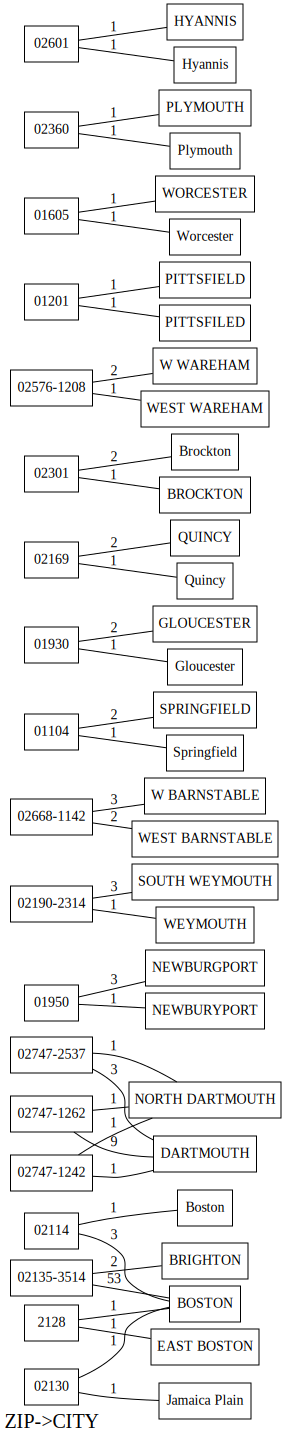

In [ ]:
providers.plot_dependency_violations('ZIP', 'CITY')

Le graphique des violations de dépendance affiche les valeurs de ZIP sur le côté gauche et les valeurs de CITY sur le côté droit. Une arête relie un code postal à gauche avec une ville à droite s'il existe une ligne contenant ces deux valeurs. Les bords sont annotés avec le nombre de ces lignes. Par exemple, il y a deux lignes avec le code postal 02747-1242, une ligne avec la ville « NORTH DARTHMOUTH » et l'autre avec la ville « DARTHMOUTH », comme indiqué dans le tracé précédent et le code suivant :

In [7]:
providers[providers.ZIP == '02747-1242'].CITY.value_counts()

,count
CITY,
NORTH DARTMOUTH,1
DARTMOUTH,1


Le graphique montre également que parmi les lignes comportant CITY  "DARTMOUTH", neuf lignes ont un code postal de 02747-1262 ; une ligne a un code postal de 02747-1242  :

In [8]:
providers[providers.CITY == 'DARTMOUTH'].ZIP.value_counts()


,count
ZIP,
02747-4302,13
02747-1262,9
02747-3717,4
02747-2537,3
02747-1242,1


En revenant au graphique des violations de dépendances, vous pouvez voir qu'il existe en fait plusieurs problèmes intéressants de qualité des données présents dans ce modèle sémantique :

Certains noms de villes sont tous en majuscules. Ce problème est facile à résoudre à l’aide de méthodes de chaîne.


Certains noms de villes comportent des qualificatifs (ou préfixes), tels que « Nord » et « Est ». Par exemple, le code postal « 2128 » correspond une fois à « EAST BOSTON » et une fois à « BOSTON ». Un problème similaire se produit entre « NORTH DARTHMOUTH » et « DARTHMOUTH ». Vous pouvez essayer de supprimer ces qualificatifs ou de mapper les codes postaux à la ville avec l'occurrence la plus courante.


Il y a des fautes de frappe dans certaines villes, telles que "PITTSFIELD" contre "PITTSFILED" et "NEWBURGPORT contre "NEWBURYPORT". Dans le cas de "NEWBURGPORT", cette faute de frappe peut être corrigée en utilisant l'occurrence la plus courante. Dans le cas de " PITTSFIELD", n'ayant qu'une seule occurrence chacune, il est beaucoup plus difficile de lever l'ambiguïté automatique sans connaissances externes ni utilisation d'un modèle de langage.
Parfois, les préfixes comme « Ouest » sont abrégés en une seule lettre « W ». Cela pourrait potentiellement être résolu par un simple remplacement, si toutes les occurrences de « W » signifient « Ouest ».


Le code postal "02130" correspond une fois à "BOSTON" et à "Jamaica Plain" une fois. Ce problème n’est pas facile à résoudre, mais s’il y avait plus de données, le mappage vers l’occurrence la plus courante pourrait être une solution potentielle.

## Nettoyer les données

Résolvez les problèmes de majuscules en remplaçant toutes les majuscules par la casse du titre :

In [9]:
providers['CITY'] = providers.CITY.str.title()

Exécutez à nouveau la détection des violations pour constater que certaines ambiguïtés ont disparu (le nombre de violations est plus petit) :

In [10]:
providers.list_dependency_violations('ZIP', 'CITY')

INFO:SemPy:{'func': 'sempy.fabric._dataframe._fabric_dataframe.list_dependency_violations', 'self.type': 'sempy.fabric._dataframe._fabric_dataframe.FabricDataFrame', 'self.shape': (5855, 12), 'determinant_col': "'ZIP'", 'dependent_col': "'CITY'", 'result.shape': (22, 3), 'total_seconds': 289.0}


,ZIP,CITY,count
0,02135-3514,Boston,53
1,02135-3514,Brighton,2
2,02747-1262,Dartmouth,9
3,02747-1262,North Dartmouth,1
4,01950,Newburgport,3
5,01950,Newburyport,1
6,02190-2314,South Weymouth,3
7,02190-2314,Weymouth,1
8,02668-1142,W Barnstable,3
9,02668-1142,West Barnstable,2


À ce stade, vous pouvez affiner vos données plus manuellement, mais une tâche potentielle de nettoyage des données consiste à supprimer les lignes qui violent les contraintes fonctionnelles entre les colonnes des données, en utilisant la fonction drop_dependency_violations de SemPy.

Pour chaque valeur de la variable déterminante, drop_dependency_violations fonctionne en sélectionnant la valeur la plus courante de la variable dépendante et en supprimant toutes les lignes avec d'autres valeurs. Vous ne devez appliquer cette opération que si vous êtes sûr que cette heuristique statistique conduira aux résultats corrects pour vos données. Sinon, vous devez écrire votre propre code pour gérer les violations détectées selon vos besoins.

In [ ]:
providers_clean = providers.drop_dependency_violations('ZIP', 'CITY')

In [ ]:
providers_clean.list_dependency_violations('ZIP', 'CITY')

No violations


,ZIP,CITY,count


La liste vide montre qu'il n'y a plus de violations de la contrainte fonctionnelle CITY -> ZIP.